In [29]:
import getData
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model


In [48]:
cow_amm_address = '0x301076c36e034948a747bb61bab9cd03f62672e3' #WETH/USDC
cow_amm_address = '0x1c7828dadade12a848f36be8e2d3146462abff68' #GNO/OLAS
df = getData.data(cow_amm_address)

2024-05-15 09:41:02,531 INFO dune_client.api.base executing 3726052 on medium cluster
2024-05-15 09:41:04,460 INFO dune_client.api.base waiting for query execution 01HXXK57PGB4WK9C5HKB892ZFP to complete: ExecutionState.PENDING (queue position: 1)
2024-05-15 09:41:05,967 INFO dune_client.api.base waiting for query execution 01HXXK57PGB4WK9C5HKB892ZFP to complete: ExecutionState.EXECUTING
2024-05-15 09:41:07,036 INFO dune_client.api.base waiting for query execution 01HXXK57PGB4WK9C5HKB892ZFP to complete: ExecutionState.EXECUTING
2024-05-15 09:41:08,089 INFO dune_client.api.base waiting for query execution 01HXXK57PGB4WK9C5HKB892ZFP to complete: ExecutionState.EXECUTING
2024-05-15 09:41:09,141 INFO dune_client.api.base waiting for query execution 01HXXK57PGB4WK9C5HKB892ZFP to complete: ExecutionState.EXECUTING
2024-05-15 09:41:10,191 INFO dune_client.api.base waiting for query execution 01HXXK57PGB4WK9C5HKB892ZFP to complete: ExecutionState.EXECUTING
2024-05-15 09:41:11,239 INFO dune_clie

In [40]:
print(df.columns) 


Index(['blockchain', 'cow_amm_address', 'token_1_address', 'token_2_address',
       'token0_balance', 'token0_balance_usd', 'token2_balance',
       'token1_balance_usd', 'time', 'decimals0', 'price0',
       'contract_address0', 'minute', 'decimals1', 'price1',
       'contract_address1', 'token1_balance'],
      dtype='object')


In [45]:
def alphap(X,Y,f=0.01, g=20):
    beta = np.sqrt(X*Y)
    return (2+f+g/beta+np.sqrt((g/beta+f)**2+4*g/beta))/2

def alpham(X,Y, f = 0.01, g = 20):
    beta = np.sqrt(X*Y)
    return 2/(2+f+g/beta+np.sqrt((g/beta+f)**2+4*g/beta))


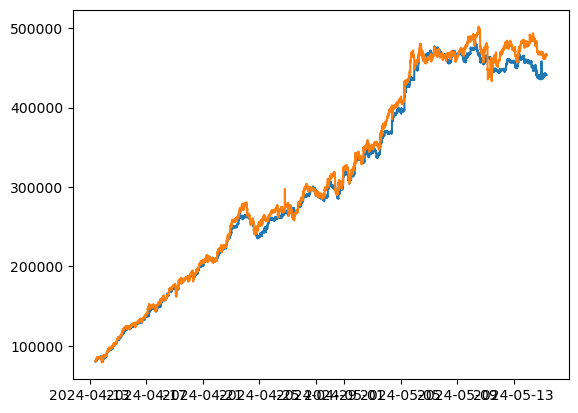

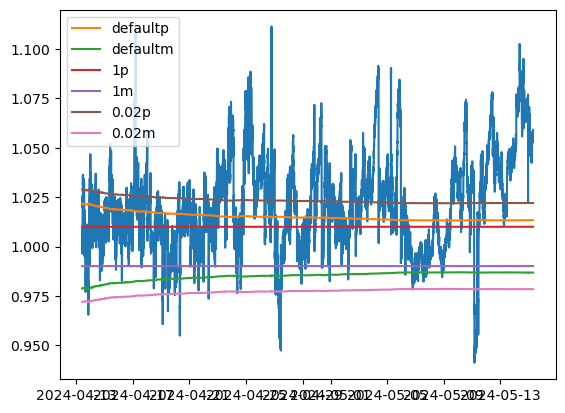

In [71]:
df = df[df['token0_balance']*df['price0'] > 80000]
plt.plot(df['minute'],df['price0']*df['token0_balance'])
plt.plot(df['minute'],df['price1']*df['token1_balance'])
plt.show()

plt.plot(df['minute'],(df['price0']*df['token0_balance'])**-1*(df['price1']*df['token1_balance']))

plt.plot(df['minute'], alphap(df['token0_balance']*df['price0'],df['token1_balance']*df['price1']), label = 'defaultp')
plt.plot(df['minute'], alpham(df['token0_balance']*df['price0'],df['token1_balance']*df['price1']), label = 'defaultm')
plt.plot(df['minute'], alphap(df['token0_balance']*df['price0'],df['token1_balance']*df['price1'], g=0), label = '1p')
plt.plot(df['minute'], alpham(df['token0_balance']*df['price0'],df['token1_balance']*df['price1'], g= 0), label = '1m')
plt.plot(df['minute'], alphap(df['token0_balance']*df['price0'],df['token1_balance']*df['price1'], f=0.02), label = '0.02p')
plt.plot(df['minute'], alpham(df['token0_balance']*df['price0'],df['token1_balance']*df['price1'], f=0.02), label = '0.02m')
plt.legend()
plt.show()

In [64]:
# Créer un modèle GARCH
model = arch_model(100*df['price1'], vol='Garch', p=1, q=1)

# Ajuster le modèle
model_fit1 = model.fit()

# Afficher le résumé du modèle
print(model_fit1.summary())

# Créer un modèle GARCH
model0 = arch_model(df['price0'], vol='Garch', p=1, q=1)

# Ajuster le modèle
model_fit0 = model0.fit()

# Afficher le résumé du modèle
print(model_fit0.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 96489223.47911671
Iteration:      2,   Func. Count:     12,   Neg. LLF: 136334566950.82114
Iteration:      3,   Func. Count:     19,   Neg. LLF: 293778.7514228253
Iteration:      4,   Func. Count:     26,   Neg. LLF: 210796.1102068394
Iteration:      5,   Func. Count:     31,   Neg. LLF: 211892.60396372504
Iteration:      6,   Func. Count:     43,   Neg. LLF: 210953.372780527
Iteration:      7,   Func. Count:     50,   Neg. LLF: 208262.7316225752
Iteration:      8,   Func. Count:     56,   Neg. LLF: 207201.23481603662
Iteration:      9,   Func. Count:     62,   Neg. LLF: 205668.5455219197
Iteration:     10,   Func. Count:     68,   Neg. LLF: 205572.808986497
Iteration:     11,   Func. Count:     74,   Neg. LLF: 205539.06201687385
Iteration:     12,   Func. Count:     80,   Neg. LLF: 205485.14288500033
Iteration:     13,   Func. Count:     85,   Neg. LLF: 205424.2414955871
Iteration:     14,   Func. Count:     90,   Neg. LLF: 205421.

45873    3.250968
45874    4.359112
45875    4.359112
45876    4.359112
45877    4.359112
           ...   
91896    0.481192
91897    0.441217
91898    0.441217
91899    0.441217
91900    0.441217
Name: cond_vol, Length: 45933, dtype: float64
45873    1.088817
45874    0.905912
45875    0.905912
45876    0.905912
45877    0.905912
           ...   
91896    2.203015
91897    2.213814
91898    2.213814
91899    2.213814
91900    2.213814
Name: cond_vol, Length: 45933, dtype: float64


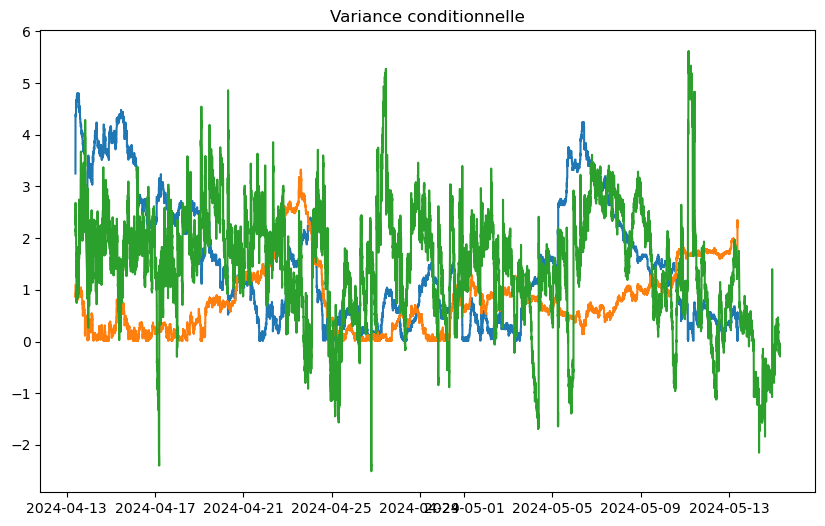

In [65]:
# Obtenir la variance conditionnelle
conditional_var = model_fit1.conditional_volatility/25

# Afficher la variance conditionnelle
print(conditional_var)

# Créer un graphique de la variance conditionnelle
plt.figure(figsize=(10, 6))
plt.plot(df['time'], conditional_var)

# Obtenir la variance conditionnelle
conditional_var = model_fit0.conditional_volatility/25

# Afficher la variance conditionnelle
print(conditional_var)

# Créer un graphique de la variance conditionnelle
plt.plot(df['time'], conditional_var)
plt.plot(df['minute'],(df['price0']*df['token0_balance']/(df['price1']*df['token1_balance'])-0.95)*50)
plt.title('Variance conditionnelle')
plt.show()